In [1]:
import numpy as np
import matplotlib.pyplot as plt
import huffman as hf
import pickle
import admm_fq_prires as adfp
import utils

In [2]:
rng = np.random.default_rng()

In [3]:
nr_samples = 100000
mean = 0
var = 0.01
decimals = 10
training_data = rng.normal(mean, np.sqrt(var), (nr_samples,)).round(decimals)
training_data = np.concatenate([training_data, np.zeros((int(nr_samples / 15),))])

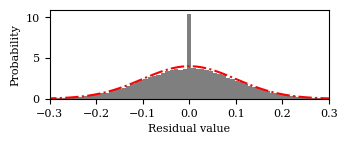

In [4]:
textwidth = 245
linewidth = 1.2
plt.rcParams.update(
    {
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": False,  # don't use inline math for ticks (not on docker image)
        "pgf.rcfonts": False,  # don't setup fonts from rc parameters
        "font.size": 8,
    }
)
fig, ax = plt.subplots(figsize=utils.set_size(textwidth, 1.0, (1, 1), 0.4))
ax.hist(training_data, 100, align="mid", color="k", alpha=0.5, density=True)
x = np.linspace(-0.5, 0.5, 100)
y = 1 / (np.sqrt(2 * np.pi * var)) * np.exp(-1 / 2 * x**2 / var)
ax.plot(x, y, "r-.")
ax.set_xlim(-0.3, 0.3)
# ax.grid()
ax.set_xlabel("Residual value")
ax.set_ylabel("Probability")
plt.tight_layout(pad=0.5)
plt.show()
utils.savefig(fig, "dist-example", "pdf")

In [16]:
nr_samples = 1000000
mean = 0
var = 0.1
decimals = 10
training_data = rng.normal(mean, np.sqrt(var), (nr_samples,))
training_data = np.concatenate([training_data, np.zeros((int(nr_samples / 15),))])

hist_range = [-1, 1]
nr_bins = 301
step = (hist_range[1] - hist_range[0]) / nr_bins
bins = np.arange(hist_range[0], hist_range[1] + step, step)
centers = ((bins[1:] + bins[:-1]) / 2).round(12)
resample_hist_range = [-1, 1]
resample_nr_bins = 19
resample_step = (resample_hist_range[1] - resample_hist_range[0]) / resample_nr_bins
resample_bins = np.arange(
    resample_hist_range[0], resample_hist_range[1] + resample_step, resample_step
)
resample_centers = ((resample_bins[1:] + resample_bins[:-1]) / 2).round(10)

In [17]:
resample_training_data = np.array([])
for i, cent in enumerate(resample_centers):
    pp = training_data[np.isclose(training_data, cent, atol=step / 2)]
    resample_training_data = np.concatenate(
        [resample_training_data, np.ones(pp.shape) * i]
    )

resample_training_data = resample_training_data.astype(int)

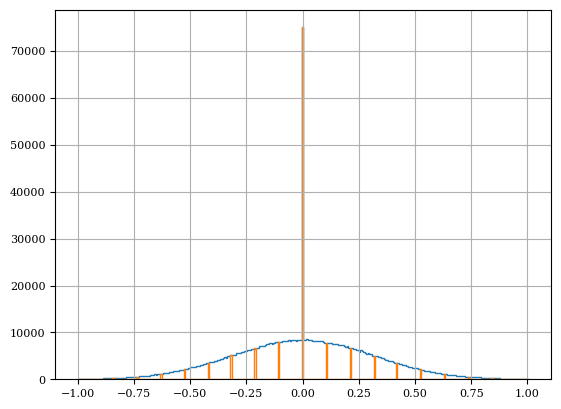

In [18]:
counts, bins = np.histogram(training_data, bins)
plt.stairs(counts, bins)
counts, bins = np.histogram(resample_centers[resample_training_data], bins)
plt.stairs(counts, bins)
plt.grid()
plt.show()

In [19]:
data = resample_training_data
encoded, tree = hf.huffman_encode(data)
table = hf.huffman_table(tree)

# Pretty print the Huffman table
print(f"Symbol Code\n------ ----")
for i, (k, v) in enumerate(
    sorted(hf.huffman_table(tree).items(), key=lambda x: len(x[1]))
):
    # if i > 10:
    #     break
    print(f"{k:<6} {v}")

# Print the bit pattern of the encoded data
# print("".join(hf._bits_from_bytes(encoded)))

# Encode then decode
decoded = hf.huffman_decode(encoded, tree)
numbers_decoded = list(decoded)

# print(numbers - numbers_decoded)
print("Error:", np.linalg.norm(resample_training_data - numbers_decoded))

# print(numbers - numbers_decoded)
print(
    "Error:",
    np.linalg.norm(
        resample_centers[resample_training_data] - resample_centers[numbers_decoded]
    ),
)

Counter({9: 75082, 8: 8017, 10: 7761, 11: 6775, 7: 6639, 6: 5099, 12: 4980, 5: 3549, 13: 3477, 14: 2129, 4: 2100, 15: 1189, 3: 1146, 16: 588, 2: 525, 17: 260, 1: 256, 18: 93, 0: 90})
Symbol Code
------ ----
9      1
12     0000
6      0001
7      0010
11     0011
10     0101
8      0110
13     01000
5      01001
4      011101
14     011110
3      0111110
15     0111111
17     01110000
2      01110010
16     01110011
1      011100011
18     0111000101
256    01110001000
0      01110001001
Error: 0.0
Error: 0.0


In [20]:
data = np.array([7] * 10)
encoded = hf._encode(data, table)
print("".join(hf._bits_from_bytes(encoded)))

encoded = hf._encode(data, table)
decoded = hf.huffman_decode(encoded, tree)
numbers_decoded = list(decoded)

resample_centers[numbers_decoded]
# numbers_decoded

# print(numbers - numbers_decoded)
# print("Error:", np.linalg.norm(training_data - numbers_decoded))

00100010001000100010001000100010001000100111000100000000


array([-0.21052632, -0.21052632, -0.21052632, -0.21052632, -0.21052632,
       -0.21052632, -0.21052632, -0.21052632, -0.21052632, -0.21052632])

In [38]:
with open("test.p", "wb") as f:
    pickle.dump(tree, f)

In [39]:
with open("test.p", "rb") as f:
    l_tree = pickle.load(f)

encoded, tree = hf.huffman_encode(data)
hf._bits_from_bytes(encoded)
decoded = hf.huffman_decode(encoded, l_tree)
numbers_decoded = np.frombuffer(decoded)

# print(numbers - numbers_decoded)
print("Error:", np.linalg.norm(training_data - numbers_decoded))

Error: 0.0
